<a href="https://colab.research.google.com/github/LoreBonora/T1/blob/main/T1_Explora%C3%A7%C3%A3o_do_dataset_Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Identificação:

Loredana Bonora Cobianchi

RA: 20.83987-0

#Montando o drive e carregando os Datasets


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [20]:
df_clientes = pd.read_csv('/content/drive/MyDrive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_customers_dataset.csv')
df_geo = pd.read_csv('/content/drive/MyDrive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_geolocation_dataset.csv', encoding='utf8')
df_compra_itens = pd.read_csv('/content/drive/MyDrive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_order_items_dataset.csv')
df_compra_pagamentos = pd.read_csv('/content/drive/MyDrive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('/content/drive/MyDrive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_order_reviews_dataset.csv')
df_compras = pd.read_csv('/content/drive/MyDrive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_orders_dataset.csv')
df_produtos = pd.read_csv('/content/drive/MyDrive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_products_dataset.csv')
df_vendedores = pd.read_csv('/content/drive/MyDrive/Ciência de Dados e Inteligência Artificial/Fundamentos de Ciências de Dados e Inteligência Artificial/Introdução a Ciência de Dados/Datasets/olist_sellers_dataset.csv')

#Instalando o Gitly

In [4]:
!pip install -U gitly

     |████████████████████████████████| 13.2MB 5.3MB/s 
     |████████████████████████████████| 74.6MB 131kB/s 
  Created wheel for gitly: filename=gitly-1.1.4-cp36-none-any.whl size=4520 sha256=31646fa92901f90c66be72ec27388be4e543efa62c2ee5a47830801c341712f5
  Stored in directory: /root/.cache/pip/wheels/41/5c/0b/6cd3a688991c83f17c948adf0775f7907a0406d1119bd809af
Successfully built gitly
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [122]:
from gitly.colab.plot import GitlyPlotter

gitly = GitlyPlotter('git')
gitly.config_render(renderer='git')

In [91]:
import plotly.express as px

#Exploração dataset de Produtos e Itens

##Analise estrutural

In [21]:
df_produtos.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
df_produtos.shape

(32951, 9)

Esse arquivo possui 32951 linhas e 9 colunas

In [7]:
df_produtos.agg( ['nunique', 'count', 'size'] )

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
nunique,32951,73,66,2960,19,2204,99,102,95
count,32951,32341,32341,32341,32341,32949,32949,32949,32949
size,32951,32951,32951,32951,32951,32951,32951,32951,32951


Existem 73 categorias diferentes

###Quais as categorias com mais produtos?

In [109]:
df_categoria_mais_produtos = df_produtos.product_category_name.value_counts().head(5)
df_categoria_mais_produtos

cama_mesa_banho          3029
esporte_lazer            2867
moveis_decoracao         2657
beleza_saude             2444
utilidades_domesticas    2335
Name: product_category_name, dtype: int64

Não é a categoria de produtos mais vendidos pois isso dependeria de contabilizar orderID, na análise acima estamos apenas contabilizando produtos cadastrados.

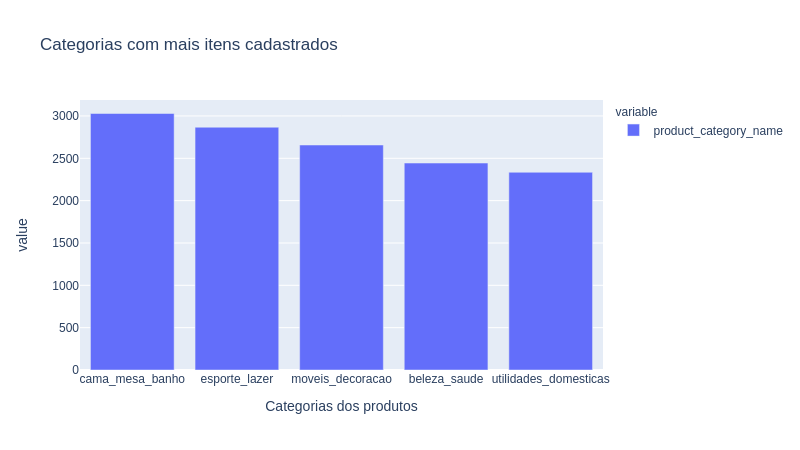

In [123]:
fig = px.bar(df_categoria_mais_produtos,  title='Categorias com mais itens cadastrados', labels={'index':'Categorias dos produtos'})
gitly.show( fig )

###Qual o produto maior em tamanho?

In [22]:
df_produtos['Volume'] = df_produtos.product_length_cm*df_produtos.product_height_cm*df_produtos.product_width_cm
df_produtos.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Volume
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0


In [30]:
df_produtos.sort_values(by = ['Volume'], axis=0, ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Volume
12802,256a9c364b75753b97bee410c9491ad8,utilidades_domesticas,59.0,649.0,1.0,25250.0,68.0,66.0,66.0,296208.0
17303,3eb14e65e4208c6d94b7a32e41add538,moveis_sala,51.0,1392.0,3.0,30000.0,70.0,60.0,70.0,294000.0
10697,0b48eade13cfad433122f23739a66898,moveis_decoracao,28.0,489.0,1.0,14000.0,70.0,60.0,70.0,294000.0
25524,c1e0531cb1864fd3a0cae57dca55ca80,moveis_sala,50.0,837.0,1.0,30000.0,70.0,60.0,70.0,294000.0
12146,f227e2d44f10f7dad30fb4dfa839e7a2,moveis_sala,51.0,795.0,1.0,30000.0,70.0,60.0,70.0,294000.0
...,...,...,...,...,...,...,...,...,...,...
15211,5a2a2db3896d33beec6828b898812ad5,NaN,NaN,NaN,NaN,200.0,16.0,2.0,11.0,352.0
961,2f763ba79d9cd987b2034aac7ceffe06,eletronicos,45.0,1198.0,2.0,595.0,8.0,6.0,6.0,288.0
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0,168.0
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN,NaN


O produto 256a9c364b75753b97bee410c9491ad8 tem o maior volume de todos, com 296208,0 cm³. Ele está na categoria de Utilidades domésticas.

###Qual o produto que mais gerou dinheiro?

In [47]:
df_compra_itens['sub-total'] = df_compra_itens.order_item_id * df_compra_itens.price
df_compra_itens.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,sub-total
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90


In [50]:
df_prod_mais_f = df_compra_itens[['product_id', 'order_item_id', 'sub-total' ]].groupby(by=['product_id']).apply(sum)[['sub-total', 'order_item_id']]
df_prod_mais_f.head()

,sub-total,order_item_id
product_id,,
00066f42aeeb9f3007548bb9d3f33c38,101.65,1
00088930e925c41fd95ebfe695fd2655,129.90,1
0009406fd7479715e4bef61dd91f2462,229.00,1
000b8f95fcb9e0096488278317764d19,117.80,2
000d9be29b5207b54e86aa1b1ac54872,199.00,1


In [53]:
df_prod_mais_f.sort_values(by=['sub-total'] ,ascending=False).head(5)

,sub-total,order_item_id
product_id,,
bb50f2e236e5eea0100680137654686c,70485.00,215
5769ef0a239114ac3a854af00df129e4,60480.00,36
6cdd53843498f92890544667809f1595,57557.60,164
d1c427060a0f73f6b889a5c7c61f2ac4,50940.39,369
d6160fb7873f184099d9bc95e30376af,48899.34,35


O produto mais gerou dinheiro é o bb50f2e236e5eea0100680137654686c que conseguiu R$70.485,00.

###Qual o a compra mais cara?

In [58]:
df_venda_mais_cara = df_compra_itens[['order_id', 'sub-total' ]].groupby(by=['order_id']).apply(sum)[['sub-total']]
df_venda_mais_cara.sort_values(by=['sub-total'] ,ascending=False).head(5)

,sub-total
order_id,
03caa2c082116e1d31e67e9ae3700499,60480.0
1b15974a0141d54e36626dca3fdc731a,21000.0
2cc9089445046817a7539d90805e6e5a,20771.1
ab14fdcfbe524636d65ee38360e22ce8,20727.0
736e1922ae60d0d6a89247b851902527,17900.0


A compra mais cara foi a de id 03caa2c082116e1d31e67e9ae3700499 que custou R$60.480,00.

###Qual a quantidade de produtos comprados?

In [63]:
df_compra_itens.order_item_id.sum()

134936

Quase 135mil produtos.

###Qual a compra com mais itens?

In [116]:
df_compra_mais_itens = df_compra_itens[['order_id','product_id']].value_counts('order_id').head(5)

In [117]:
df_compra_mais_itens.head()

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
ab14fdcfbe524636d65ee38360e22ce8    20
1b15974a0141d54e36626dca3fdc731a    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
dtype: int64

A compra com mais itens foi a 8272b63d03f5f79c56e9e4120aec44ef com 21 itens.

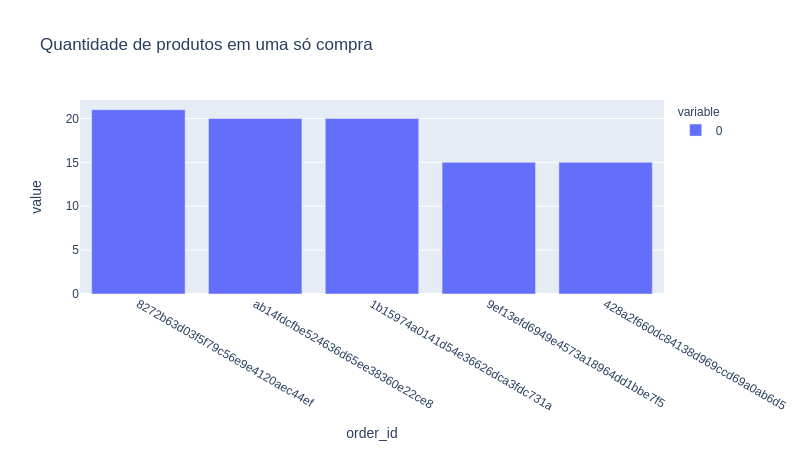

In [124]:
fig = px.bar(df_compra_mais_itens, title='Quantidade de produtos em uma só compra', labels={'index':'order_id'})
gitly.show( fig )

###Google Colab vs PowerBI

Eu brinco que a direfênça entre Mac, Windows e Linux é a seguinte: No Mac você tem uma facilidade de operação grande por ter uma interface mais intuitiva, porém não existe muita abertura para grandes configurações edições em relação aos demais. Seu preço é o mais alto.
Por sua vez, o Windows é um pouco menos intuitivo que o Mac mas tem uma maior gama de configurações, programas, e aberturas para realizar atividades que que a "Maçã". Tem um preço intermediário.
Quando chegamos no Linux temos o sistema com a maior abertura e desempenho para você fazer o que quiser, mas isso de abre para fazer muitas coisas erradas e também perde-se muito em intuitividade para leigos. É de graça.

O mesmo pode ser observado na relação Intuitividade VS Abertura e preço no IOS e Android (exceto os flagship da Samsung que também são muito caros).

Estudando ciência dos dados utilizando o Colab e o PowerBI vemos quase a mesma coisa.

O PowerBI te dá uma alta gama meios para demonstrar seus dados e insights, configurações e cores para ser o mais "user friendly" possível. Deve-se tomar cuidado pois é muito fácil acabar exibindo números e gráficos que não demonstram exatamente o resultado desejado.
Em troca disse ele pede uma mensalidade bem alta para divulgar seus arquivos.
No caso do Colab temos uma plataforma totalmente gratuita, com uma abertura muito maior de possibilidades, mas em troca disso temos que realizar uma quantidade maior de programação.

No final das contas, essa seleção de qual meio utilizar para demonstrar os dados vai depender da preferência do cliente.